In [ ]:
import sys
print("Python version:", sys.version)

import sklearn
print("Scikit-learn version:", sklearn.__version__)

import pandas as pd
print("Pandas version:", pd.__version__)


Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Scikit-learn version: 1.6.1
Pandas version: 2.2.2


In [ ]:
import pandas as pd

# Small custom dataset: mix of real and fake reviews
data = {
    "review": [
        "This phone is amazing, battery lasts two days.",
        "Worst product ever. Totally waste of money.",
        "I highly recommend this laptop. Works super fast.",
        "Do not buy this! Fake seller, product broke in one day.",
        "The camera quality is outstanding for the price.",
        "This is a fake review just to make the product look good.",
        "Absolutely love this. Great value for money.",
        "Terrible service. I think this is a scam product.",
        "Fantastic headphones, sound is crystal clear.",
        "This review is generated and not based on real experience."
    ],
    "label": [
        "real",
        "real",
        "real",
        "fake",
        "real",
        "fake",
        "real",
        "fake",
        "real",
        "fake"
    ]
}

df = pd.DataFrame(data)

# Show dataset
df.head()


,review,label
0,"This phone is amazing, battery lasts two days.",real
1,Worst product ever. Totally waste of money.,real
2,I highly recommend this laptop. Works super fast.,real
3,"Do not buy this! Fake seller, product broke in...",fake
4,The camera quality is outstanding for the price.,real


In [ ]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Simple text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()  # remove spaces
    return text

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)

# Features (X) and Labels (y)
X = df['clean_review']
y = df['label']

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7, 47)
Testing data shape: (3, 47)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

        fake       0.00      0.00      0.00         1
        real       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Confusion Matrix:
 [[0 1]
 [0 2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Naive Bayes Accuracy: 1.0
Random Forest Accuracy: 1.0


In [ ]:
# Pick your best model
best_model = model   # change to nb or rf if they were better

# Function to predict new reviews
def predict_review(review_text):
    cleaned = clean_text(review_text)
    vector = vectorizer.transform([cleaned])
    prediction = best_model.predict(vector)[0]
    return prediction

# Test with some examples
test_reviews = [
    "This is the best product I’ve ever bought in my life!",
    "The item arrived broken and is total garbage.",
    "Amazing camera, works like a charm, highly recommend.",
    "This is a fake review to make the product look good."
]

for r in test_reviews:
    print(f"Review: {r}")
    print("Predicted Label:", predict_review(r))
    print("---")


Review: This is the best product I’ve ever bought in my life!
Predicted Label: real
---
Review: The item arrived broken and is total garbage.
Predicted Label: real
---
Review: Amazing camera, works like a charm, highly recommend.
Predicted Label: real
---
Review: This is a fake review to make the product look good.
Predicted Label: real
---


In [ ]:
!pip install gradio

import gradio as gr

def predict_ui(review_text):
    return predict_review(review_text)

demo = gr.Interface(fn=predict_ui, inputs="text", outputs="text", title="Fake Review Detector")
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://52b747d621ab32ffec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the reviews
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
padded = pad_sequences(sequences, maxlen=50, padding='post')

# Encode labels
y = df['label'].map({'real': 1, 'fake': 0}).values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.3, random_state=42)

# Build LSTM model
model_dl = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model_dl.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 0.6972 - val_accuracy: 0.3333 - val_loss: 0.6974
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4286 - loss: 0.6950 - val_accuracy: 0.3333 - val_loss: 0.6939
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - accuracy: 0.4286 - loss: 0.6935 - val_accuracy: 0.6667 - val_loss: 0.6908
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.5714 - loss: 0.6922 - val_accuracy: 0.6667 - val_loss: 0.6891
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5714 - loss: 0.6914 - val_accuracy: 0.6667 - val_loss: 0.6876


In [ ]:
# Evaluate on test set
loss, acc = model_dl.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {acc:.2f}")

# Predict on new reviews
def predict_review_dl(review_text):
    cleaned = clean_text(review_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=50, padding='post')
    pred = model_dl.predict(pad)[0][0]
    return "real" if pred >= 0.5 else "fake"

# Try with some examples
sample_reviews = [
    "Absolutely amazing phone, battery lasts forever!",
    "Do not buy this, total scam!",
    "This review is generated and not from a real customer."
]

for r in sample_reviews:
    print(f"Review: {r}")
    print("Predicted Label:", predict_review_dl(r))
    print("---")


LSTM Test Accuracy: 0.67
Review: Absolutely amazing phone, battery lasts forever!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
Predicted Label: real
---
Review: Do not buy this, total scam!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Label: real
---
Review: This review is generated and not from a real customer.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: real
---


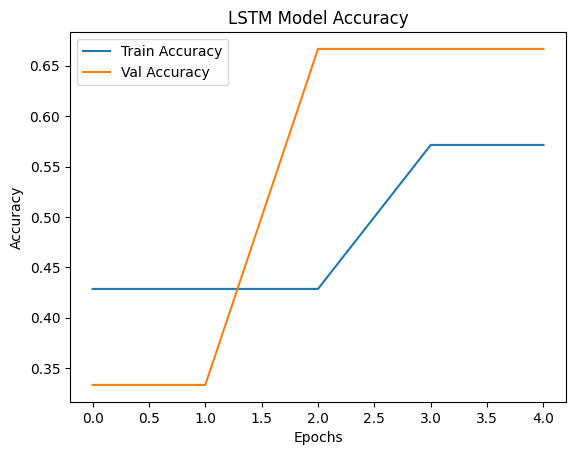

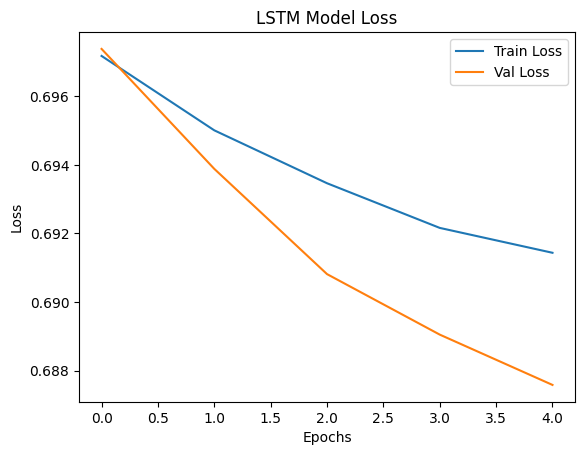

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
def predict_review_ml(review_text):
    cleaned = clean_text(review_text)                  # clean review
    vector = vectorizer.transform([cleaned])           # convert to TF-IDF
    prediction = model.predict(vector)[0]              # predict using trained model
    return prediction

# Example test
print(predict_review_ml("This phone is amazing, battery lasts forever!"))
print(predict_review_ml("Do not buy this product, total scam."))


real
fake


In [ ]:
def predict_review_dl(review_text):
    cleaned = clean_text(review_text)                        # clean review
    seq = tokenizer.texts_to_sequences([cleaned])            # convert to sequence
    pad = pad_sequences(seq, maxlen=50, padding='post')      # pad to fixed length
    pred = model_dl.predict(pad)[0][0]                       # prediction score
    return "real" if pred >= 0.5 else "fake"

# Example test
print(predict_review_dl("Absolutely love this laptop, super fast and reliable!"))
print(predict_review_dl("This is a fake review to make the product look good."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
real


In [ ]:
import joblib

# Save both model and vectorizer together
joblib.dump((model, vectorizer), "fake_review_model.pkl")


['fake_review_model.pkl']

In [ ]:
from google.colab import files
files.download("fake_review_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import joblib

# Load model + vectorizer
model, vectorizer = joblib.load("fake_review_model.pkl")

def predict_review(review):
    review_vectorized = vectorizer.transform([review])
    result = model.predict(review_vectorized)
    if result[0] == 1:
        return "✅ Genuine Review"
    else:
        return "⚠️ Fake Review"

# Streamlit UI
st.title("Fake Review Detection App 📝")
st.write("Enter a product review below to check if it's **Fake** or **Genuine**.")

# Input box
user_input = st.text_area("Write your review here:")

# Predict button
if st.button("Predict"):
    if user_input.strip() != "":
        prediction = predict_review(user_input)
        st.subheader("Result:")
        st.write(prediction)
    else:
        st.warning("⚠️ Please enter a review before predicting.")


2025-08-31 12:11:58.189 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:11:59.296 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-31 12:11:59.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:11:59.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:11:59.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:11:59.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:11:59.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:11:59.323 Thread 'MainThread': mi

In [ ]:
pip install streamlit


In [ ]:
import streamlit as st
import joblib

# Load model and vectorizer
model, vectorizer = joblib.load("fake_review_model.pkl")

def predict_review(review):
    review_vectorized = vectorizer.transform([review])
    result = model.predict(review_vectorized)
    return "✅ Genuine Review" if result[0] == 1 else "⚠️ Fake Review"

# Streamlit UI
st.title("🕵️ Fake Product Review Detector")
st.write("Paste a product review below to check if it's **fake** or **genuine**.")

# Input box
user_review = st.text_area("Enter your product review:")

# Button
if st.button("Check Review"):
    if user_review.strip():
        prediction = predict_review(user_review)
        st.success(prediction)
    else:
        st.warning("Please enter a review first.")


2025-08-31 12:12:21.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-31 12:12:21.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install pyngrok


In [ ]:
!streamlit run app.py &>/dev/null&


In [ ]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
changed 22 packages in 2s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

In [ ]:
!streamlit run app.py &


/bin/bash: line 1: streamlit: command not found


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Replace with your own ngrok authtoken from dashboard.ngrok.com
!ngrok config add-authtoken 31a5103irOTyiT48WQ2XygXCUcY_5k2pPv3Jo83vtt1N8viua


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!streamlit run app.py --server.port 8501 &>/dev/null&


In [ ]:
from pyngrok import ngrok

# Start a tunnel on port 8501 (this is where Streamlit usually runs)
public_url = ngrok.connect(8501)

print("Your app is live at:", public_url)


In [ ]:
!pkill -f ngrok


In [ ]:
!curl http://localhost:8501


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true &>/dev/null&


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true


In [ ]:
!ls


In [ ]:
%%writefile app.py
import streamlit as st
import pickle

# Load your model
with open("fake_review_model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("📰 Fake Review Detection App")

# Input box
review = st.text_area("Enter a review:")

if st.button("Check Review"):
    if review.strip() == "":
        st.warning("Please enter some text first.")
    else:
        # For now, we'll just show dummy prediction since I don’t know your preprocessing
        # Replace this with your preprocessing + model.predict([review])
        prediction = model.predict([review])
        if prediction[0] == 1:
            st.error("🚨 This looks like a Fake Review!")
        else:
            st.success("✅ This looks like a Genuine Review.")


In [ ]:
 !streamlit run app.py --server.port 8501 &>/dev/null&
from pyngrok import ngrok

# Kill old tunnels and Streamlit processes just in case
!pkill -f ngrok
!pkill -f "streamlit run app.py --server.port 8501"

# Open tunnel on the same port as Streamlit
public_url = ngrok.connect(8501)
print("Your app is live at:", public_url)

Your app is live at: NgrokTunnel: "https://367339462e92.ngrok-free.app" -> "http://localhost:8501"
